In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/google-daily-stock-prices-2004-today/googl_daily_prices.csv


# **Table of Contents**
-----------------
✅ **Import libraries.**   
✅ **Data Import & EDA.**   
✅ **Data Transform.**  
✅ **Data Visualization.**   
✅ **ML Modeling and Prediction.**   

# **1. Import Libraries.**
-----------------

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

# **2. Data Import & EDA**
--------------------


In [3]:
df = pd.read_csv('/kaggle/input/google-daily-stock-prices-2004-today/googl_daily_prices.csv')

## **Data Description**
----------------
**1. open – Opening stock price of the day**   
**2. high – Highest price reached that day**   
**3. low – Lowest price during the day**   
**4. close – Closing price of the trading day**   
**5. volume – Volume of shares traded**  

[**DataSet Inf**](https://www.kaggle.com/datasets/emrekaany/google-daily-stock-prices-2004-today/data)

## **Summary**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5229 entries, 0 to 5228
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       5229 non-null   object 
 1   1. open    5229 non-null   float64
 2   2. high    5229 non-null   float64
 3   3. low     5229 non-null   float64
 4   4. close   5229 non-null   float64
 5   5. volume  5229 non-null   float64
dtypes: float64(5), object(1)
memory usage: 245.2+ KB


In [5]:
df.describe()

,1. open,2. high,3. low,4. close,5. volume
count,5229.000000,5229.000000,5229.000000,5229.000000,5.229000e+03
mean,764.476912,772.101428,756.464920,764.418713,9.747332e+06
std,612.968788,619.087985,606.435383,612.893369,1.206705e+07
min,85.400000,86.520000,83.340000,83.430000,4.656380e+05
25%,399.900000,404.990000,393.000000,398.880000,1.813652e+06
50%,585.450000,589.010000,579.160000,584.019900,4.568000e+06
75%,998.820000,1007.560000,991.500000,1001.840000,1.311300e+07
max,3025.000000,3030.931500,2977.980000,2996.770000,1.277476e+08


## **Missing Value & Duplicate Value Check**

In [6]:
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,date,0
1,1. open,0
2,2. high,0
3,3. low,0
4,4. close,0
5,5. volume,0


In [7]:
df.duplicated().sum()

0

In [8]:
df.head()

,date,1. open,2. high,3. low,4. close,5. volume
0,2025-05-30,171.350,172.2050,167.4400,171.74,52639911.0
1,2025-05-29,174.000,174.4193,170.6300,171.86,29373803.0
2,2025-05-28,173.160,175.2650,171.9107,172.36,34783997.0
3,2025-05-27,170.160,173.1700,170.0000,172.90,37995670.0
4,2025-05-23,169.055,169.9600,167.8900,168.47,35211439.0


# **2. Data Transfromation**

In [9]:
df = df.rename(columns ={'date'   : 'Date',
                         '1. open'  : 'Open',
                         '2. high'  : 'high',
                         '3. low'   : 'low',
                         '4. close' : 'close',
                         '5. volume': 'volume'})

In [10]:
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.head()

,Date,Open,high,low,close,volume
0,2025-05-30,171.350,172.2050,167.4400,171.74,52639911.0
1,2025-05-29,174.000,174.4193,170.6300,171.86,29373803.0
2,2025-05-28,173.160,175.2650,171.9107,172.36,34783997.0
3,2025-05-27,170.160,173.1700,170.0000,172.90,37995670.0
4,2025-05-23,169.055,169.9600,167.8900,168.47,35211439.0


# **3. Data Visualization**

In [12]:
num_cols = df.select_dtypes(include = {'int64', 'float64'}).columns

## **Comparison of price fluctuations by variable**

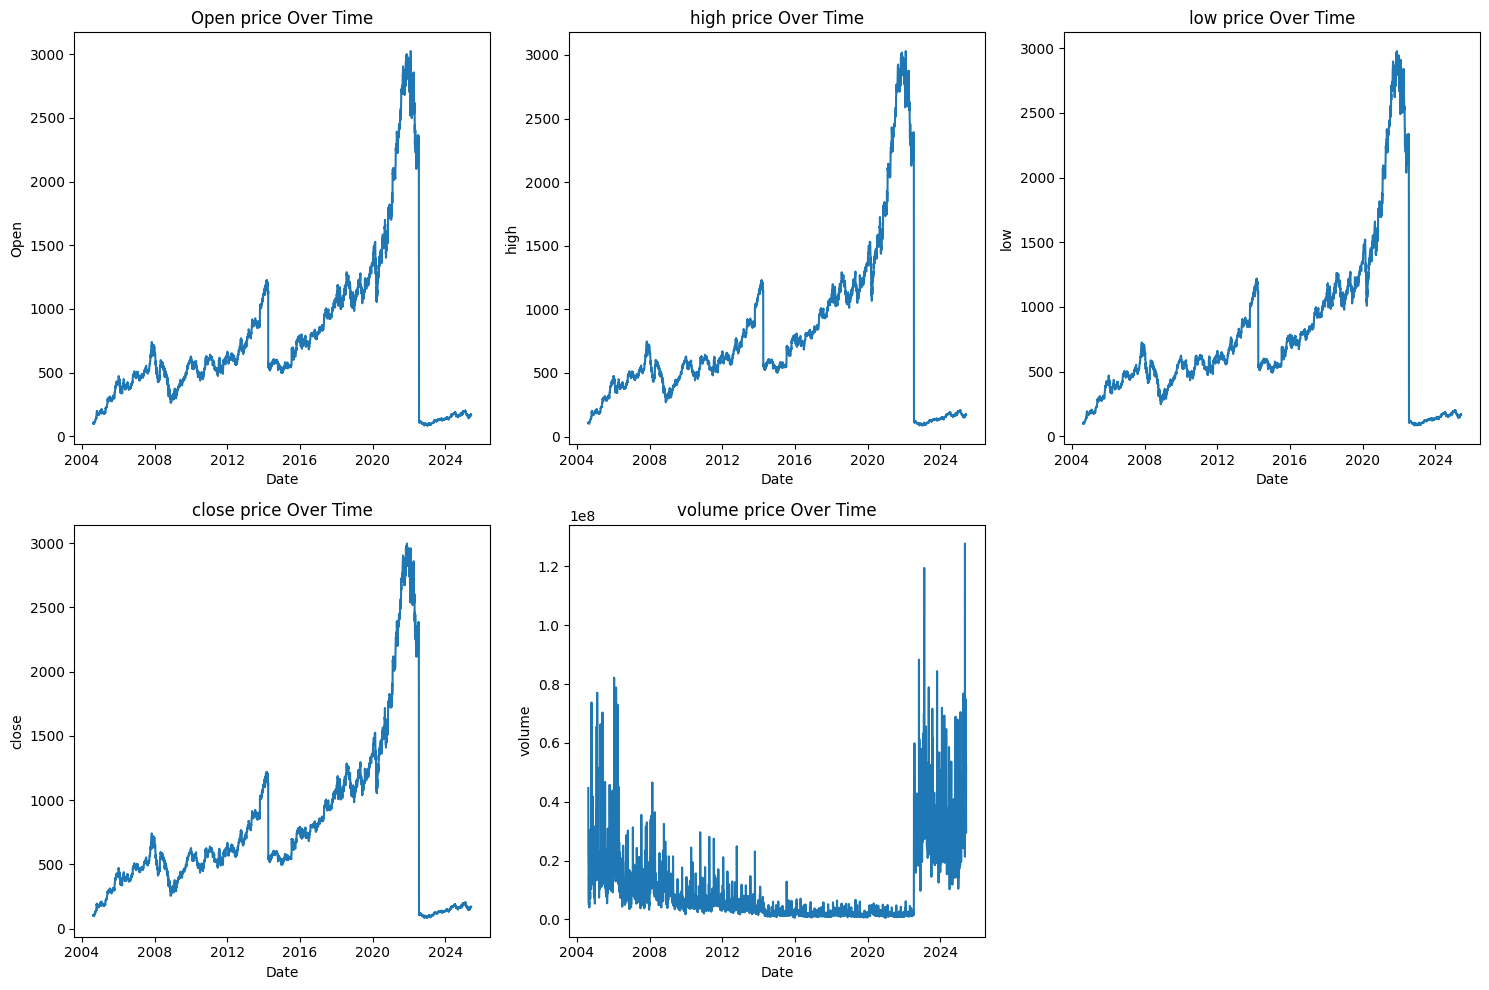

In [13]:
f, ax = plt.subplots(2,3, figsize=(15, 10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.lineplot(data = df, x= 'Date', y = cols, ax = ax[index])
    ax[index].set_title(f'{cols} price Over Time')
    
f.delaxes(ax[5])   
plt.tight_layout()
plt.show() 

* **We can compare the relative changes of indicators over time.**
* **This helps identify price fluctuations, trends, and potential market sentiment.**

## **Moving Arrange**

In [14]:
df2 = df.copy()

In [15]:
df2['MA30'] = df2['close'].rolling(window=30).mean()  
df2['MA90'] = df2['close'].rolling(window=90).mean()  
df2['MA180'] = df2['close'].rolling(window=180).mean() 

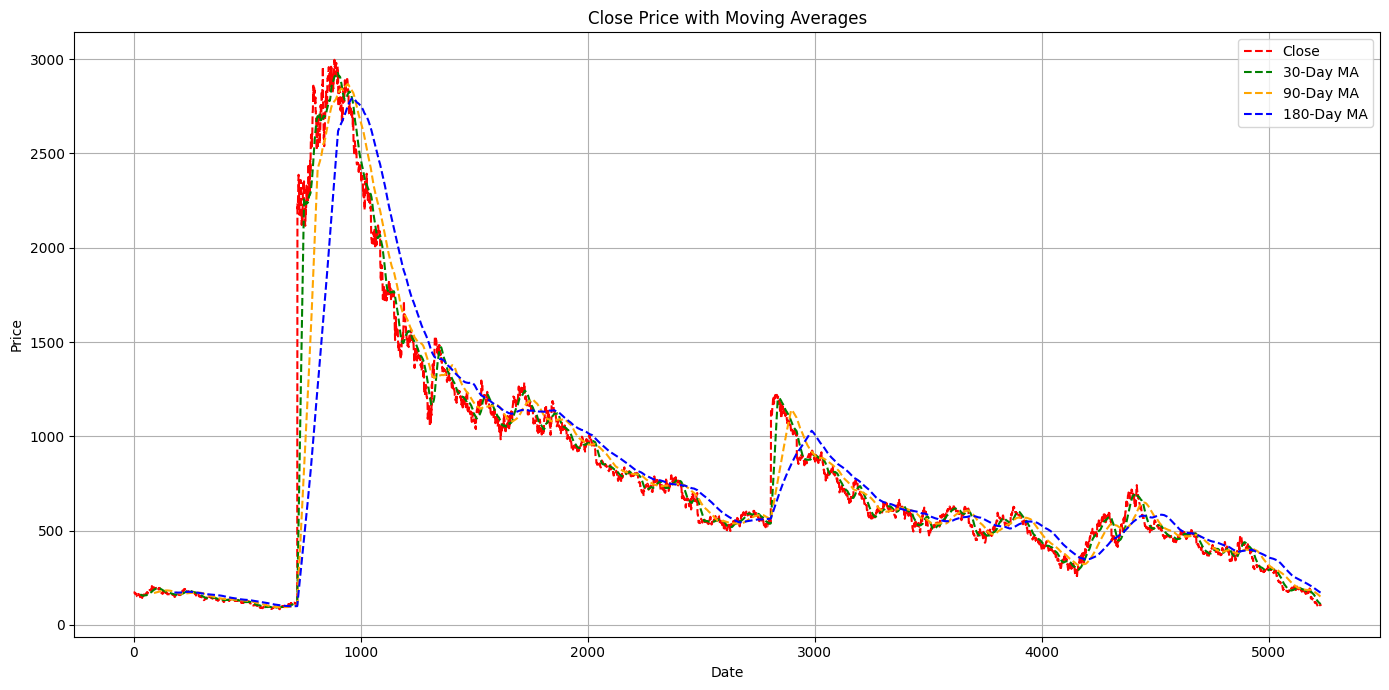

In [16]:
plt.figure(figsize=(14, 7))

plt.plot(df2.index, df2['close'], label='Close', color='red', linestyle='--') 
plt.plot(df2.index, df2['MA30'], label='30-Day MA', color='green', linestyle='--')  
plt.plot(df2.index, df2['MA90'], label='90-Day MA', color='orange', linestyle='--')  
plt.plot(df2.index, df2['MA180'], label='180-Day MA', color='blue', linestyle='--')  

plt.title('Close Price with Moving Averages')  
plt.xlabel('Date')  
plt.ylabel('Price')  
plt.legend()  

plt.grid(True)
plt.tight_layout()
plt.show()

* **Analyze price trends and see how moving averages over different periods interact with real prices.**

# **4. Modeling**

In [17]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

## **Data Preprocessing**

In [18]:
# Feature Selection : Choosing the relevant data (e.g., 'Close' price).

col = ['Date','close']
close = df[col]

In [19]:
close.index = close.Date

In [20]:
ts = close.drop('Date', axis = 1)

In [21]:
#ts['close'] = np.log(ts['close'])

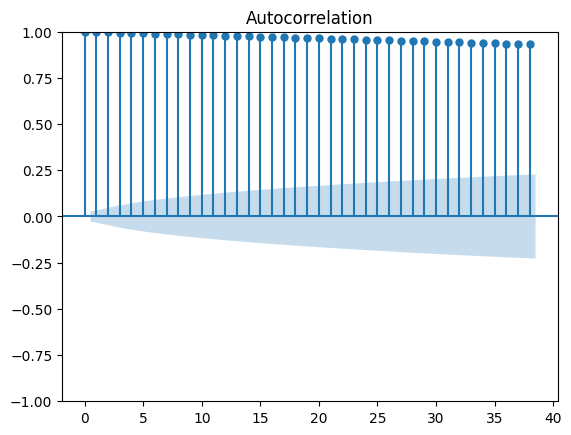

In [22]:
plot_acf(ts)
plt.show()

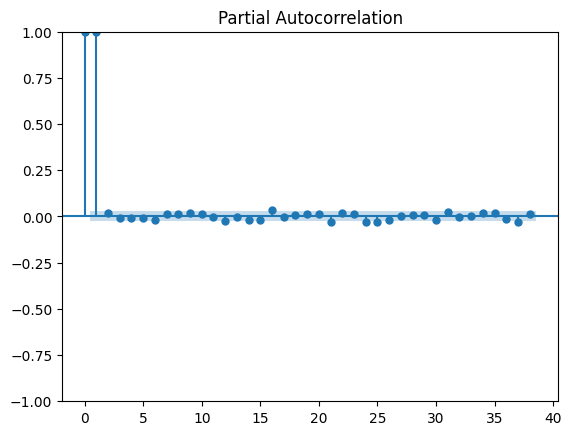

In [23]:
plot_pacf(ts)
plt.show()

In [24]:
# Determination of stationary time series  
# p-value > 0.05 is Non-stationary time series

def adf_test(data):
    result = adfuller(data.values)
    print('ADF Statistics: %f' % result[0])
    print('p-value: %f' % result[1])
    print('num of lags: %f' % result[2])
    print('num of observations: %f' % result[3])
    print('Critical values:')
    for k, v in result[4].items():
        print('\t%s: %.3f' % (k,v))
        
adf_test(ts)

ADF Statistics: -2.065797
p-value: 0.258488
num of lags: 24.000000
num of observations: 5204.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


* **The null hypothesis cannot be rejected because the p-value is more than 0.05.**   
* **This data does not satisfy stationarity.**

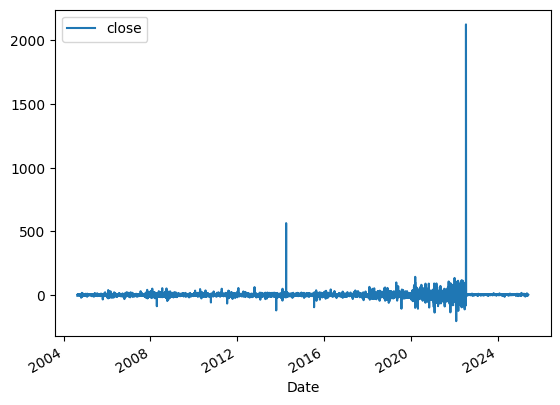

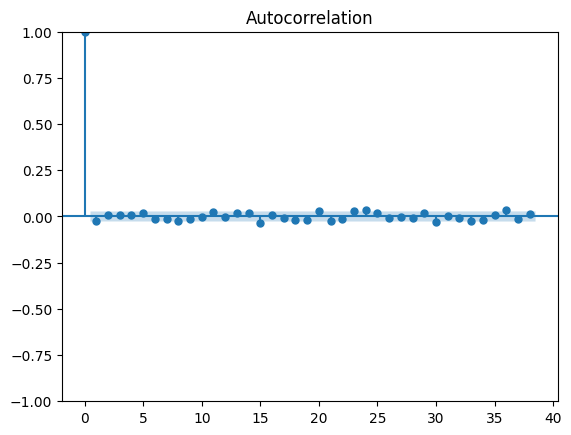

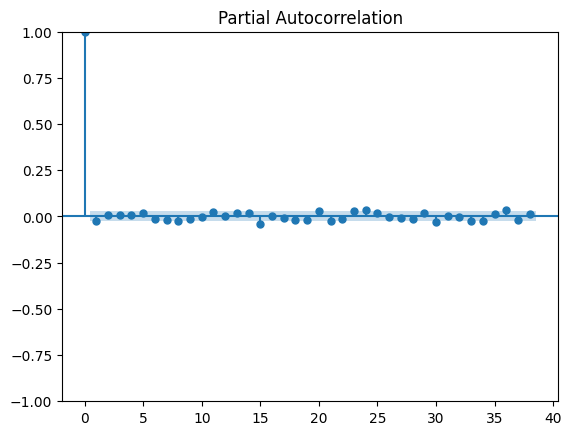

ADF Statistics: -14.380124
p-value: 0.000000
num of lags: 23.000000
num of observations: 5204.000000
Critical values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


In [25]:
# first diff

diff_1 = ts.diff(periods=1).iloc[1:]
diff_1.plot()
plt.show()

plot_acf(diff_1)
plot_pacf(diff_1)
plt.show()

adf_test(diff_1)

* **It seems to satisfy normality.**

## **Modeling**

In [26]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 40.3 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [27]:
import pmdarima as pm

# auto_arima
model = pm.auto_arima(
    ts['close'],
    start_p=0, max_p=5,
    start_q=0, max_q=5,
    d=None,              # Differencing Automatic determination
    seasonal=False,      # non-seasonable time series is False
    stepwise=True,       
    trace=True           
)
print(model.summary())

forecast = model.predict(n_periods=60, dynamic=False)

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=52032.477, Time=0.14 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=52031.895, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=52031.942, Time=0.38 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=52030.478, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=52033.688, Time=0.32 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 1.052 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 5229
Model:               SARIMAX(0, 1, 0)   Log Likelihood              -26014.239
Date:                Mon, 02 Jun 2025   AIC                          52030.478
Time:                        08:41:36   BIC                          52037.039
Sample:                             0   HQIC                         52032.772
                               - 5229                                  

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


## **Prediction**

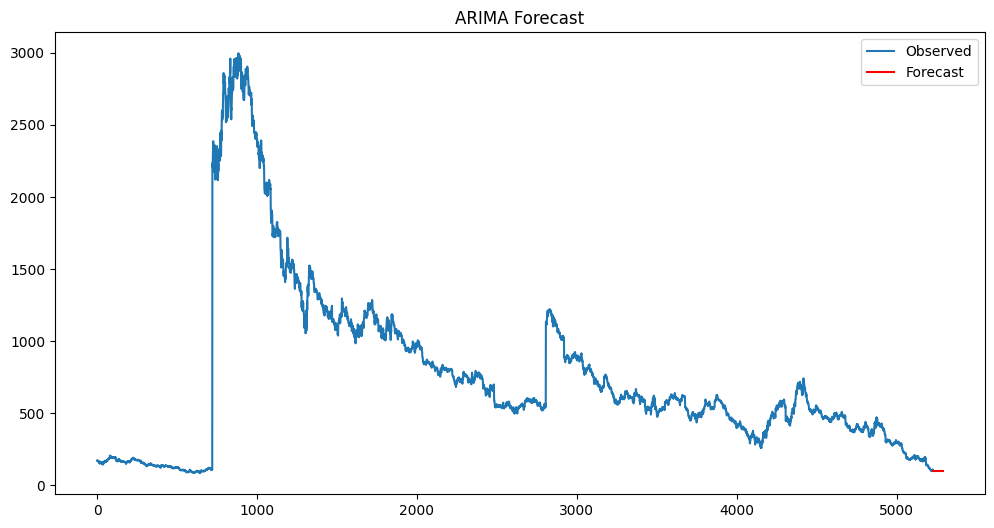

In [28]:
plt.figure(figsize=(12, 6))
plt.plot(df['close'], label='Observed')
plt.plot(range(len(ts), len(ts) + 60), forecast, label='Forecast', color='red')
plt.title('ARIMA Forecast')
plt.legend()
plt.show()

**The model doesn't seem to recognize the pattern.** 
**I think it would be better to use lstm or gru.**

---------------
**Please leave your advice in the comments. Thank you**